# Import Libraries and Load Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Load CSV Files and Basic Checks
traindata = pd.read_csv('product_train.csv') 
traindata.head()
traindata.info()
traindata.isnull().sum() # Find Null Values 





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16440 entries, 0 to 16439
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16440 non-null  int64 
 1   Product_ID               16440 non-null  int64 
 2   Age                      16440 non-null  int64 
 3   Review_Title             13802 non-null  object
 4   Review_Text              15838 non-null  object
 5   Rating                   16440 non-null  int64 
 6   Recommended              16440 non-null  int64 
 7   Positive_Feedback_Count  16440 non-null  int64 
 8   Division                 16431 non-null  object
 9   Department               16431 non-null  object
 10  Type                     16431 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.4+ MB


ID                            0
Product_ID                    0
Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      9
Department                    9
Type                          9
dtype: int64

# Data Cleaning

In [2]:
#Review_Title Column is dropped as it has largest missing values among all features. Also as there very low correlation between this feature and recommendation we have dropped it.

traindata2 = traindata.drop(['Review_Title','Age','Positive_Feedback_Count'],axis = 1)

# Dropping Null Values from the remaining data
#traindata1 = traindata_feat.dropna()

#Age and Positive Feedbackcounts Bins
age_bins = pd.cut(traindata['Age'],4,labels = ('Young','Middle Aged','Late Middle Aged','Old'))
Fb_bins = pd.cut(traindata['Positive_Feedback_Count'],4,labels = ('Very Low','Low','Medium','High'))

#Joining Bins Columns again with the Dataset
traindata1 = pd.concat([traindata2,age_bins,Fb_bins],axis =1)

traindata1.describe() #QC check for Dropping Null Values
#Fill Missing Values with 'Missing Value'
traindata1["Division"].fillna("Missing Value", inplace = True) 
traindata1["Department"].fillna("Missing Value", inplace = True) 
traindata1["Type"].fillna("Missing Value", inplace = True) 
traindata1["Review_Text"].fillna("Missing Value", inplace = True) 


#One-Hot encoding for Categorical Variables
traindata1['Department'] = pd.get_dummies(traindata1['Department'])
traindata1['Division'] = pd.get_dummies(traindata1.Division)
traindata1['Type'] = pd.get_dummies(traindata1.Type)
traindata1['Age'] = pd.get_dummies(traindata1.Age)
traindata1['Positive_Feedback_Count'] = pd.get_dummies(traindata1.Positive_Feedback_Count)

#QC Checks For Label Encoding
print(traindata1)
traindata1.head()
traindata1.describe()

          ID  Product_ID                                        Review_Text  \
0      12906         984  Just received and sorry to return. i am 5'9" i...   
1      22440         872  This is a tts basic tee with the added flare o...   
2      13965         862  I am very happy with this shirt. i don't like ...   
3      14369         829  Really flattering cut, this shirt is perfect f...   
4        505         833  Love the fabric & lace on this top. like other...   
...      ...         ...                                                ...   
16435   2178         872  Agree with the other reviewers. this top is ex...   
16436    182         895  I like this sweater so much i just bought it i...   
16437  18285        1081  I bought this dress for the summer, but it wil...   
16438   7534         949  Cute twist with the open back on a simple clas...   
16439  17157        1094  I fell in love with this dress in the store an...   

       Rating  Recommended  Division  Department  T

,ID,Product_ID,Rating,Recommended,Division,Department,Type,Age,Positive_Feedback_Count
count,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000,16440.000000
mean,11709.318066,918.378163,4.203710,0.824027,0.588625,0.159367,0.129501,0.400122,0.993127
std,6769.069499,203.941617,1.106165,0.380809,0.492098,0.366029,0.335764,0.489938,0.082624
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5865.750000,861.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11703.500000,936.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,17540.500000,1078.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23485.000000,1205.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

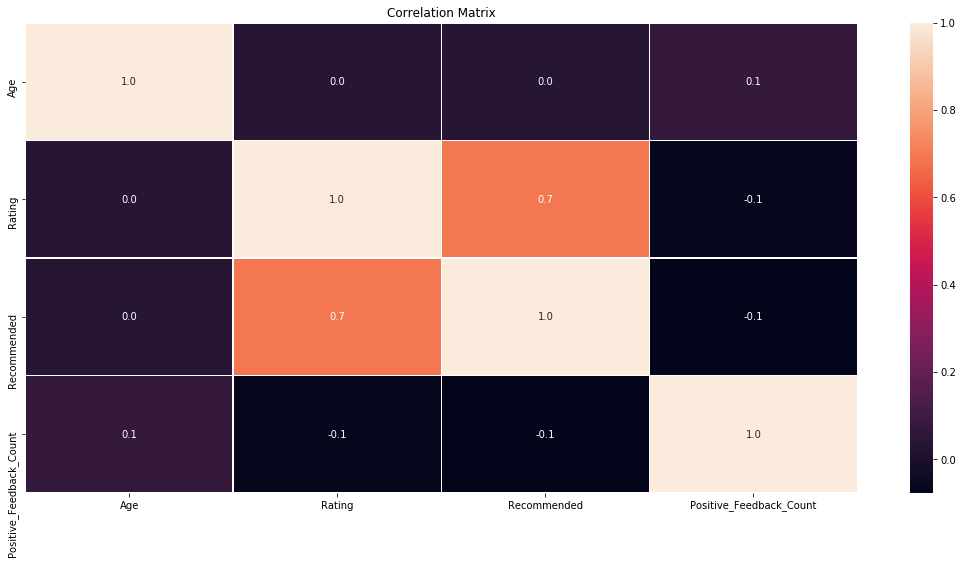

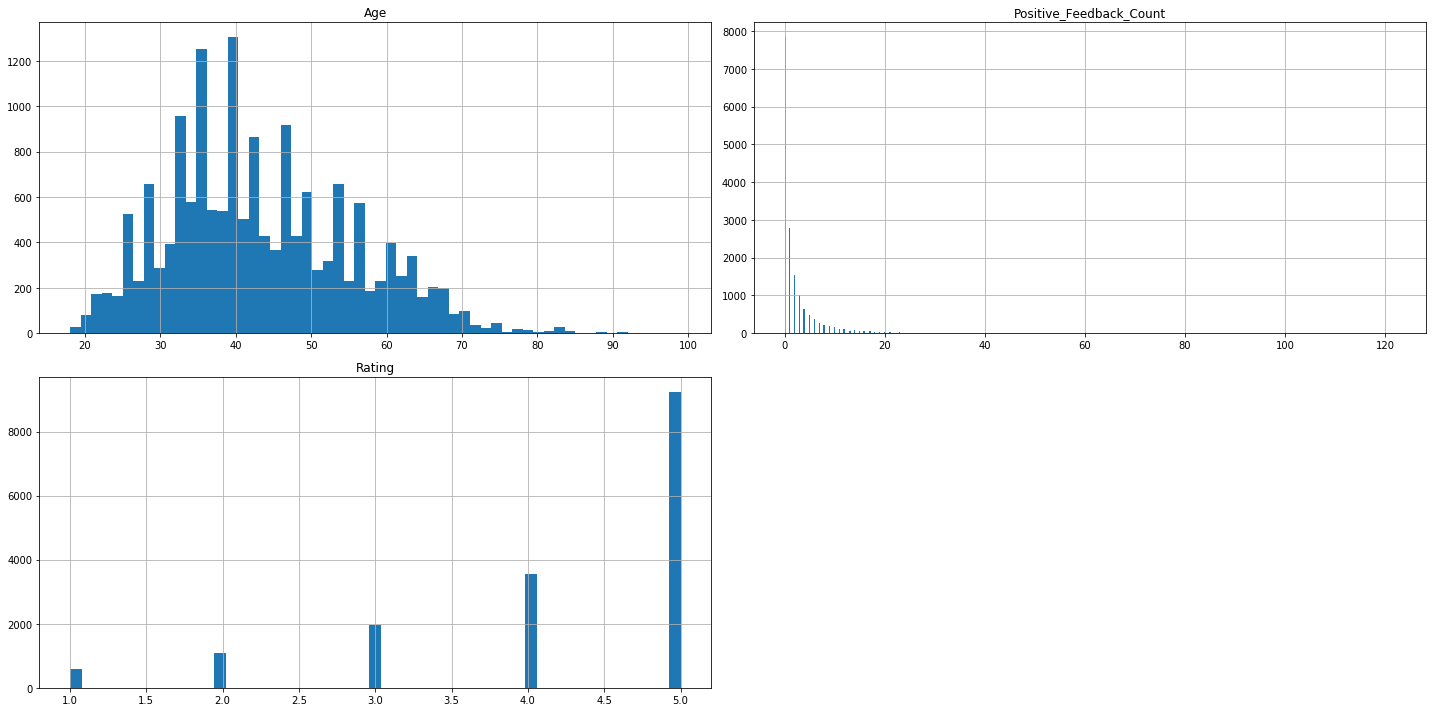

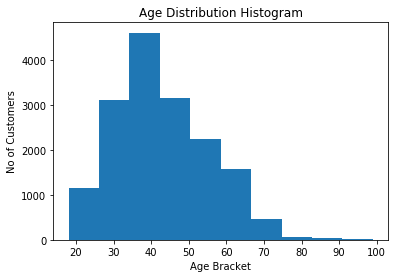

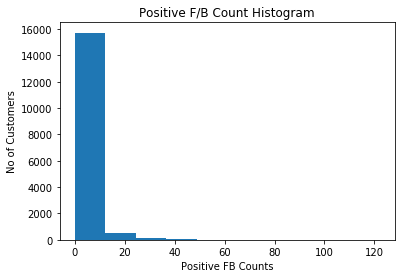

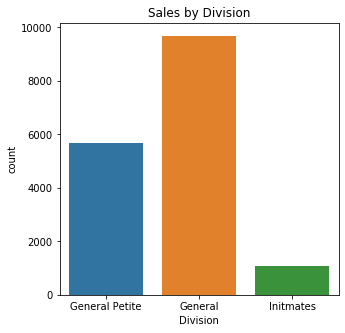

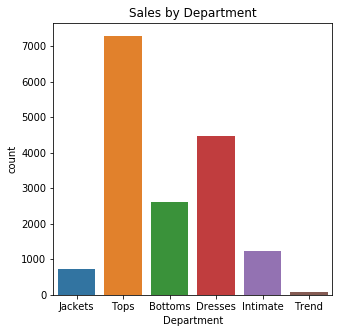

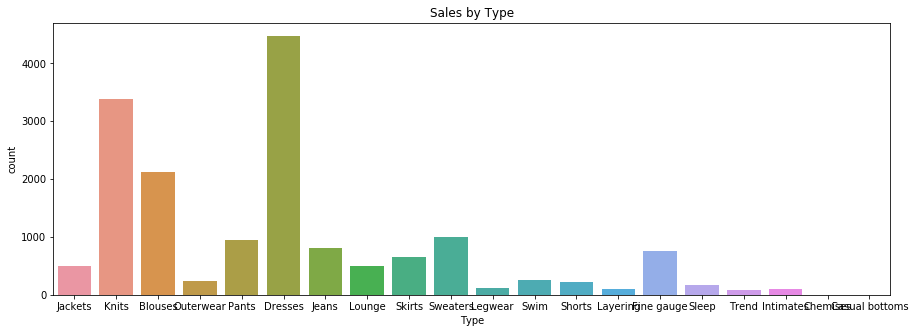

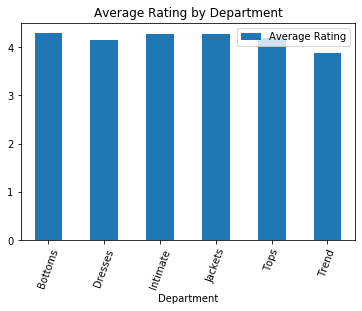

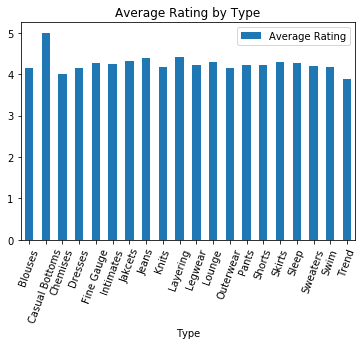

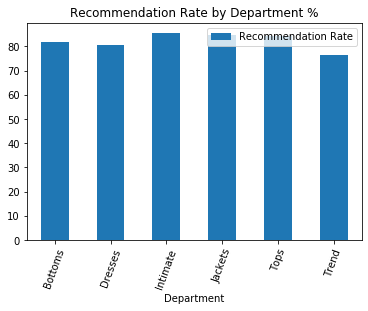

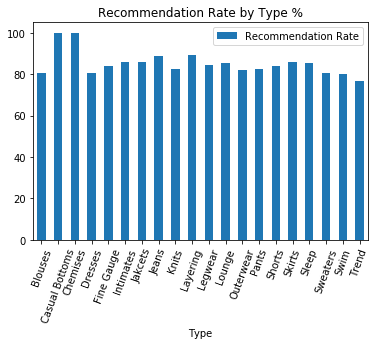

In [3]:
# Trim Data for CorrelationMatrix  
corr_matdata = traindata.drop(['ID','Product_ID'],axis = 1)

#correlation map
f,ax = plt.subplots(figsize=(15,8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matdata.corr(method='spearman'), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.tight_layout()
plt.show()

# Trim Data to only include numerical variables
hist_data = traindata.drop(['ID','Product_ID','Recommended'], axis = 1) 

#Plot Histograms for Numerical Variables
hist_data.hist(figsize = (20, 10), bins = 'auto')
plt.tight_layout()
plt.show()


# Age Histogram
%matplotlib inline
age = traindata['Age']
plt.hist(age)
plt.ylabel('No of Customers')
plt.xlabel('Age Bracket')
plt.title('Age Distribution Histogram')
plt.show()

fbc = traindata['Positive_Feedback_Count']
plt.hist(fbc)
plt.ylabel('No of Customers')
plt.xlabel('Positive FB Counts')
plt.title('Positive F/B Count Histogram')
plt.show()


# Distribution based on Divisions
plt.figure(figsize = (5,5))
plt.ylabel('No of Customers')
plt.xlabel('Division')
plt.title('Sales by Division')
sns.countplot(x='Division', data=traindata);

# Distribution based on Departments
plt.figure(figsize = (5,5))
plt.ylabel('No of Customers')
plt.xlabel('Department')
plt.title('Sales by Department')
sns.countplot(x='Department', data=traindata);


# Distribution based on Types
plt.figure(figsize = (15,5))
plt.ylabel('No of Customers')
plt.xlabel('Type')
plt.title('Sales by Type')
sns.countplot(x='Type', data=traindata);

#Average Rating By Department
a = pd.pivot_table(traindata, values='Rating', index = 'Department')
dept = {"Department":["Bottoms", "Dresses", "Intimate","Jackets","Tops","Trend"],

        "Average Rating":[4.29,4.15,4.27,4.28,4.18,3.88]  };   
dept_df = pd.DataFrame(data=dept);
dept_df.plot.bar(x="Department", y="Average Rating", rot=70, title="Average Rating by Department");

#Average Rating By Type
type1 = {"Type":["Blouses", "Casual Bottoms", "Chemises","Dresses","Fine Gauge","Intimates","Jakcets","Jeans","Knits","Layering","Legwear","Lounge","Outerwear","Pants","Shorts","Skirts","Sleep","Sweaters","Swim","Trend"],
        "Average Rating":[4.15,5,4.0,4.15,4.26,4.25,4.33,4.38,4.18,4.42,4.21,4.3,4.16,4.22,4.23,4.29,4.27,4.19,4.18,3.88]  };   
type1_df = pd.DataFrame(data=type1);
type1_df.plot.bar(x="Type", y="Average Rating", rot=70, title="Average Rating by Type");


#Recommendation Rate By Department
a = pd.pivot_table(traindata, values='Rating', index = 'Department')
dept_p = {"Department":["Bottoms", "Dresses", "Intimate","Jackets","Tops","Trend"],

        "Recommendation Rate":[81.8, 80.7,85.5,84.7,84.4,76.5]  };   
dept_p_df = pd.DataFrame(data=dept_p);
dept_p_df.plot.bar(x="Department", y="Recommendation Rate", rot=70, title="Recommendation Rate by Department %");

#Recommendation Rate By Department
type1_p = {"Type":["Blouses", "Casual Bottoms", "Chemises","Dresses","Fine Gauge","Intimates","Jakcets","Jeans","Knits","Layering","Legwear","Lounge","Outerwear","Pants","Shorts","Skirts","Sleep","Sweaters","Swim","Trend"],
        "Recommendation Rate":[80.8,100,100,80.7,84,86,85.7,88.8,82.3,89.3,84.5,85.4,81.8,82.7,83.9,85.9,85.5,80.6,80.0,76.5]  };   
type1_p_df = pd.DataFrame(data=type1_p);
type1_p_df.plot.bar(x="Type", y="Recommendation Rate", rot=70, title="Recommendation Rate by Type %");

# Benchmark Model - Bag of Words

In [4]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

#Set benchmark parameters
log_reg_bow = LogisticRegression(solver = 'liblinear')
vect_bow = CountVectorizer(max_features = 500)

#Defining the independent variable
y_bow = traindata1['Review_Text']

#Setting up the bag of words
bow = vect_bow.fit_transform(y_bow)

#Splitting test data from training data
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow, traindata1['Recommended'])

#Setting up logistic regression model
model = log_reg_bow.fit(X_train_bow, y_train_bow)
print(log_reg_bow)

 # Testing Benchmark Model
    
#Cross validation score
print("Training Accuracy score: {:.3f}".format(log_reg_bow.score(X_train_bow, y_train_bow)))
print("Test Accuracy score: {:.3f}".format(log_reg_bow.score(X_test_bow, y_test_bow)))

#Classification report
from sklearn.metrics import classification_report
ytest_pred_bow = log_reg_bow.predict(X_test_bow)
classificationrep_bow = classification_report(y_test_bow, ytest_pred_bow)
print("Classification report:\n{}:".format(classificationrep_bow))

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_bow = confusion_matrix(y_test_bow, ytest_pred_bow)
print("Confusion matrix:\n{}:".format(confusion_bow))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Training Accuracy score: 0.903
Test Accuracy score: 0.884
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       700
           1       0.91      0.95      0.93      3410

    accuracy                           0.88      4110
   macro avg       0.81      0.75      0.77      4110
weighted avg       0.88      0.88      0.88      4110
:
Confusion matrix:
[[ 379  321]
 [ 154 3256]]:


# Tfidf Model

In [5]:
#Import Libraries and Define Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tfidf = TfidfVectorizer(stop_words = 'english')
log_reg_tfidf = LogisticRegression(solver = 'liblinear')

#Corupus means Review text
tfidf = vect_tfidf.fit_transform(y_bow)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf, traindata1['Recommended'], test_size = 0.3)
log_reg_tfidf.fit(X_train_tfidf, y_train_tfidf)
print(log_reg_tfidf)

#Accuracy score
print("Mean Training data accuracy: {:.3f}".format(log_reg_tfidf.score(X_train_tfidf, y_train_tfidf)))
print("Test data accuracy: {:.3f}".format(log_reg_tfidf.score(X_test_tfidf, y_test_tfidf)))

#Classification report
ytest_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)
classificationrep_tfidf = classification_report(y_test_tfidf, ytest_pred_tfidf)
print("Classification report:\n{}:".format(classificationrep_tfidf))

#Confusion matrix for TFIDF Model
confusion_tfidf = confusion_matrix(y_test_tfidf, ytest_pred_tfidf)
print("Confusion matrix:\n{}:".format(confusion_tfidf))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Mean Training data accuracy: 0.909
Test data accuracy: 0.878
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.43      0.56       900
           1       0.88      0.98      0.93      4032

    accuracy                           0.88      4932
   macro avg       0.85      0.70      0.75      4932
weighted avg       0.87      0.88      0.86      4932
:
Confusion matrix:
[[ 387  513]
 [  87 3945]]:


# Grid Search Optimization of TF-IDF model

In [6]:
#Use grid search to optimise hyperparameters of TFDIF

#import GridsearchCV

from sklearn.model_selection import GridSearchCV

#Set up grid of parameters to tune to optimisation

param_grid = {
    'C': np.linspace(1e-5, 1e4, 20),
    'penalty': ['l1','l2','none'],
    'solver': ['lbfgs', 'liblinear','newton-cg'],
}

#Set up grid of parameters to tune to optimisation

grid_cv1 = GridSearchCV (log_reg_tfidf, param_grid, cv = 5)

grid_cv1.fit(X_train_tfidf, y_train_tfidf)

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to conv

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05...
       2.10526317e+03, 2.63157895e+03, 3.15789474e+03, 3.68421053e+03,
       4.21052632e+03, 4.73684211e+03, 5.26315790e+03, 5.78947369e+03,
       6.31578948e+03, 6.84210527e+03, 7.36842106e+03, 7.89473684e+03,
       8.42105263e+03, 8.94736842e+03, 9.47368421e+03, 1.00000000e+04]),
       

# Optimized TF-IDF performance

Mean Training data accuracy: 0.996
Test data accuracy: 0.856
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2026
           1       1.00      1.00      1.00      9482

    accuracy                           1.00     11508
   macro avg       1.00      0.99      0.99     11508
weighted avg       1.00      1.00      1.00     11508
:
Confusion matrix:
[[1984   42]
 [   3 9479]]:


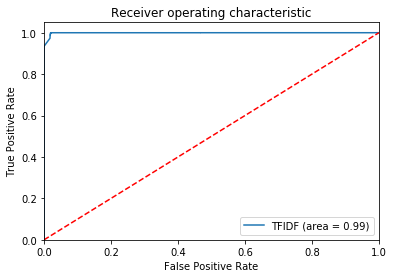

In [8]:
#Show optimized hyperparameters
grid_cv1.best_params_

#Accuracy score
print("Mean Training data accuracy: {:.3f}".format(grid_cv1.score(X_train_tfidf, y_train_tfidf)))
print("Test data accuracy: {:.3f}".format(grid_cv1.score(X_test_tfidf, y_test_tfidf)))

#Classification report
ytrain_pred_tfidf_opt = grid_cv1.predict(X_train_tfidf)
classificationrep_tfidf_opt = classification_report(y_train_tfidf, ytrain_pred_tfidf_opt)
print("Classification report:\n{}:".format(classificationrep_tfidf_opt))

#Confusion matrix for Optimized TFIDF Model
confusion_tfidf_opt = confusion_matrix(y_train_tfidf, ytrain_pred_tfidf_opt)
print("Confusion matrix:\n{}:".format(confusion_tfidf_opt))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_tfidf, ytrain_pred_tfidf_opt)
fpr, tpr, thresholds = roc_curve(y_train_tfidf, grid_cv1.predict_proba(X_train_tfidf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='TFIDF (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression Model without Text Features

Optimization terminated successfully.
         Current function value: 0.154035
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            Recommended   No. Observations:                16440
Model:                          Logit   Df Residuals:                    16437
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 Jun 2020   Pseudo R-squ.:                  0.6689
Time:                        03:57:56   Log-Likelihood:                -2532.3
converged:                       True   LL-Null:                       -7648.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Rating                      2.9097      0.057     51.443      0.000       2.799   

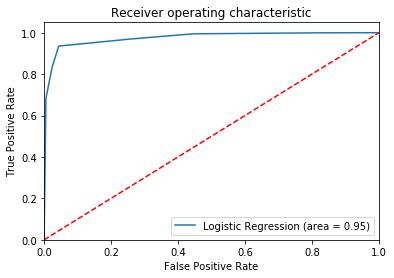

In [11]:
#Make Log Reg with Normal Data without Bag of Words
from sklearn.linear_model import LogisticRegression
import numpy as np

#Drop Text Data for now to build a base model
x_lgr = traindata1.drop(['ID','Product_ID','Review_Text','Recommended', 'Division', 'Department', 'Type'],axis = 1)
y_lgr= traindata1['Recommended']

import statsmodels.api as sm
logit_model_lgr=sm.Logit(y_lgr,x_lgr)
result_lgr=logit_model_lgr.fit()
print(result_lgr.summary())

#As most columns have P value less than .005 we will not remove any P value

#Model Fitting
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
X_train_lgr, X_test_lgr, y_train_lgr, y_test_lgr = train_test_split(x_lgr, y_lgr, test_size=0.3, random_state=0)
logreg_lgr = LogisticRegression()
logreg_lgr.fit(X_train_lgr, y_train_lgr)

#Predict Test Results
y_pred_lgr = logreg_lgr.predict(X_train_lgr)
print('Mean training data accuracy: {:.3f}'.format(logreg_lgr.score(X_train_lgr, y_train_lgr)))
print('Test data accuracy: {:.3f}'.format(logreg_lgr.score(X_test_lgr, y_test_lgr)))
print(y_pred_lgr)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_lgr = confusion_matrix(y_train_lgr, y_pred_lgr)
print(confusion_matrix_lgr)

#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_train_lgr, y_pred_lgr))

logit_roc_auc = roc_auc_score(y_train_lgr, y_pred_lgr)
fpr, tpr, thresholds = roc_curve(y_train_lgr, logreg_lgr.predict_proba(X_train_lgr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [12]:
#Use grid search to optimise hyperparameters of Multivariate log regression

#Set up grid of parameters to tune to optimisation

param_grid = {
    'C': np.linspace(1e-5, 1e4, 20),
    'penalty': ['l1','l2','none'],
    'solver': ['lbfgs', 'liblinear','newton-cg'],
}

#Set up grid of parameters to tune to optimisation

grid_cv2 = GridSearchCV (logreg_lgr, param_grid, cv = 10)

grid_cv2.fit(X_train_lgr, y_train_lgr)

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' wil

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Sett

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\rahulpra

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueErr

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Sett

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
C:\Users\rahulpra

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' wil

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Sett

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Sett

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueErr

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Sett

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 5....
       2.10526317e+03, 2.63157895e+03, 3.15789474e+03, 3.68421053e+03,
       4.21052632e+03, 4.73684211e+03, 5.26315790e+03, 5.78947369e+03,
       6.31578948e+03, 6.84210527e+03, 7.36842106e+03, 7.89473684e+03,
       8.42105263e+03, 8.94736842e+03, 9.47368421e+03, 1.00000000e+04]),
      

In [14]:
#Show optimized hyperparameters
grid_cv2.best_params_

{'C': 1e-05, 'penalty': 'none', 'solver': 'lbfgs'}

Mean Training data accuracy: 0.939
Test data accuracy: 0.938
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2026
           1       0.99      0.94      0.96      9482

    accuracy                           0.94     11508
   macro avg       0.88      0.95      0.90     11508
weighted avg       0.95      0.94      0.94     11508
:
Confusion matrix:
[[1937   89]
 [ 611 8871]]:


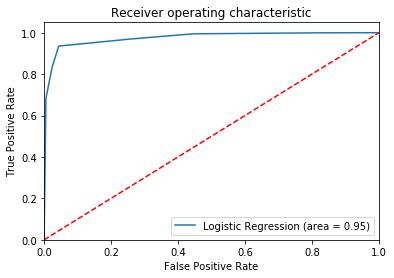

In [15]:
#Accuracy score
print("Mean Training data accuracy: {:.3f}".format(grid_cv2.score(X_train_lgr, y_train_lgr)))
print("Test data accuracy: {:.3f}".format(grid_cv2.score(X_test_lgr, y_test_lgr)))

#Classification report
ytrain_pred_lgr_opt = grid_cv2.predict(X_train_lgr)
classificationrep_lgr_opt = classification_report(y_train_lgr, ytrain_pred_lgr_opt)
print("Classification report:\n{}:".format(classificationrep_lgr_opt))

#Confusion matrix for Optimized TFIDF Model
confusion_lgr_opt = confusion_matrix(y_train_lgr, ytrain_pred_lgr_opt)
print("Confusion matrix:\n{}:".format(confusion_lgr_opt))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_lgr, ytrain_pred_lgr_opt)
fpr, tpr, thresholds = roc_curve(y_train_lgr, grid_cv2.predict_proba(X_train_lgr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Final Combined Model - Tfidf along with Other Variables Logistic Regression

         Current function value: 0.145751
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\rahulpraj\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.687    
Dependent Variable: Recommended      AIC:              5204.2985
Date:               2020-06-03 03:59 BIC:              6792.0379
No. Observations:   16440            Log-Likelihood:   -2396.1  
Df Model:           205              LL-Null:          -7648.4  
Df Residuals:       16234            LLR p-value:      0.0000   
Converged:          0.0000           Scale:            1.0000   
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -0.1114     0.6899    -0.1614   0.8718   -1.4635    1.2408
x2      -0.0373     0.9688    -0.0385   0.9693   -1.9362    1.8616
x3      -0.1041     0.7214    -0.1443   0.8853   -1.5180    1.3098
x4      -0.2130     0.6124    -0.3478   0.7280   -1.4134    0.9874
x5      -0.3140     0.4791    -0.655

Mean training data accuracy: 0.952
Test data accuracy: 0.939
[[1761  265]
 [ 289 9193]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2026
           1       0.97      0.97      0.97      9482

    accuracy                           0.95     11508
   macro avg       0.92      0.92      0.92     11508
weighted avg       0.95      0.95      0.95     11508



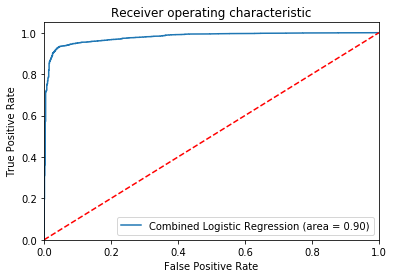

In [16]:
#Preparing Data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import scipy as sp
from sklearn.feature_extraction.text import TfidfVectorizer

#Define Vectorizers
vect_tfidf = TfidfVectorizer(stop_words = 'english')
#Convert the Review_text into their CountVectorizer sparse matrix and join this matrix with the remaining features
vect1_mod1 = TfidfVectorizer(max_features = 200, stop_words = 'english',ngram_range=(1, 1))
#vect2_mod1 = TfidfVectorizer(max_features = 25, stop_words = 'english',ngram_range=(1, 1)) 
X_mod1 = sp.sparse.hstack((vect1_mod1.fit_transform(traindata1.Review_Text),traindata1[['Age','Rating','Positive_Feedback_Count','Division','Department','Type']].values),format='csr')
X_columns_mod1 =vect1_mod1.get_feature_names()+traindata1[['Age','Rating','Positive_Feedback_Count','Division','Department','Type']].columns.tolist()

x_mod1 = X_mod1.toarray()
y_mod1 = traindata1["Recommended"]

#Checks
#print(X_mod1)
#print(X_columns_mod1)

#Log Reg Model
import statsmodels.api as sm
logit_model_mod1=sm.Logit(y_mod1,x_mod1)
result_mod1=logit_model_mod1.fit(method='bfgs')
print(result_mod1.summary2())


#Model Fitting
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
X_train_mod1, X_test_mod1, y_train_mod1, y_test_mod1 = train_test_split(x_mod1, y_mod1, test_size=0.3, random_state=0)
logreg_mod1 = LogisticRegression(max_iter=10000)
logreg_mod1.fit(X_train_mod1, y_train_mod1)

#Predict Accuracuy of Model
y_pred_mod1 = logreg_mod1.predict(X_train_mod1)
print('Mean training data accuracy: {:.3f}'.format(logreg_mod1.score(X_train_mod1, y_train_mod1)))
print('Test data accuracy: {:.3f}'.format(logreg_mod1.score(X_test_mod1, y_test_mod1)))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_mod1 = confusion_matrix(y_train_mod1, y_pred_mod1)
print(confusion_matrix_mod1)

#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_train_mod1, y_pred_mod1))

#ROC Curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_mod1 = roc_auc_score(y_test_mod1, logreg_mod1.predict(X_test_mod1))
fpr, tpr, thresholds = roc_curve(y_test_mod1, logreg_mod1.predict_proba(X_test_mod1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Combined Logistic Regression (area = %0.2f)' % logit_roc_auc_mod1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Combined Logistric Regression - Optimization

In [17]:
#Use grid search to optimise hyperparameters of Multivariate log regression

#Set up grid of parameters to tune to optimisation

param_grid = {
    'C': np.linspace(1e-5, 1e4, 20),
    'penalty': ['l1','l2','none'],
    'solver': ['lbfgs', 'liblinear','newton-cg', 'bfgs'],
}

#Set up grid of parameters to tune to optimisation

grid_cv3 = GridSearchCV(logreg_mod1, param_grid, cv = 5)

grid_cv3.fit(X_train_mod1, y_train_mod1)

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got bfgs.

  FitFail

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got bfgs.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFail

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got bfgs.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: F

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got bfgs.

  FitFailedWarning)
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters 

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\rahulpraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarn

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 5...
       2.10526317e+03, 2.63157895e+03, 3.15789474e+03, 3.68421053e+03,
       4.21052632e+03, 4.73684211e+03, 5.26315790e+03, 5.78947369e+03,
       6.31578948e+03, 6.84210527e+03, 7.36842106e+03, 7.89473684e+03,
       8.42105263e+03, 8.94736842e+03, 9.47368421e+03, 1.00000000e+04]),
      

In [18]:
#Show optimized hyperparameters
grid_cv3.best_params_

{'C': 1e-05, 'penalty': 'none', 'solver': 'lbfgs'}

Mean Training data accuracy: 0.952
Test data accuracy: 0.938
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2026
           1       0.97      0.97      0.97      9482

    accuracy                           0.95     11508
   macro avg       0.92      0.92      0.92     11508
weighted avg       0.95      0.95      0.95     11508
:
Confusion matrix:
[[1747  279]
 [ 272 9210]]:


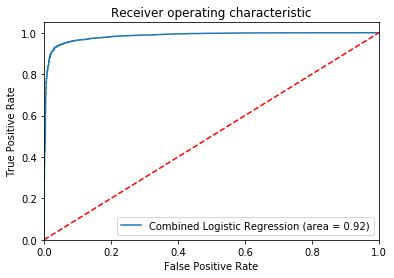

In [19]:
#Accuracy score
print("Mean Training data accuracy: {:.3f}".format(grid_cv3.score(X_train_mod1, y_train_mod1)))
print("Test data accuracy: {:.3f}".format(grid_cv3.score(X_test_mod1, y_test_mod1)))

#Classification report
ytrain_pred_mod1_opt = grid_cv3.predict(X_train_mod1)
classificationrep_mod1_opt = classification_report(y_train_mod1, ytrain_pred_mod1_opt)
print("Classification report:\n{}:".format(classificationrep_mod1_opt))

#Confusion matrix for Optimized Combined Log reg model
confusion_mod1_opt = confusion_matrix(y_train_mod1, ytrain_pred_mod1_opt)
print("Confusion matrix:\n{}:".format(confusion_mod1_opt))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_mod1, ytrain_pred_mod1_opt)
fpr, tpr, thresholds = roc_curve(y_train_lgr, grid_cv3.predict_proba(X_train_mod1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Combined Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model Optimisation - Trials we have done to optimize the model

         Current function value: 0.166891
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\61406\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.641    
Dependent Variable: Recommended      AIC:              5899.3747
Date:               2020-06-02 17:32 BIC:              7487.1141
No. Observations:   16440            Log-Likelihood:   -2743.7  
Df Model:           205              LL-Null:          -7648.4  
Df Residuals:       16234            LLR p-value:      0.0000   
Converged:          0.0000           Scale:            1.0000   
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -0.3441     0.6316    -0.5448   0.5859   -1.5821    0.8938
x2      -0.1547     0.7883    -0.1963   0.8444   -1.6997    1.3903
x3      -0.4490     0.6495    -0.6913   0.4894   -1.7220    0.8240
x4      -0.6144     0.5825    -1.0549   0.2915   -1.7560    0.5271
x5      -0.6991     0.4493    -1.556

Accuracy of logistic regression classifier on test set: 0.94
[[1763  263]
 [ 290 9192]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2026
           1       0.97      0.97      0.97      9482

    accuracy                           0.95     11508
   macro avg       0.92      0.92      0.92     11508
weighted avg       0.95      0.95      0.95     11508



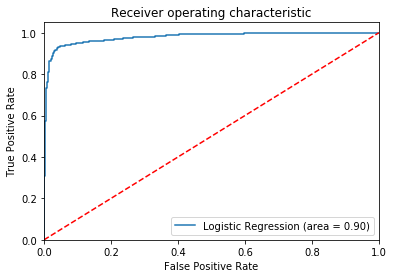

In [221]:
#Preparing Data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy as sp

#Convert the Review_text into their CountVectorizer sparse matrix and join this matrix with the remaining features

#vect1_mod2 = TfidfVectorizer(max_features = 100, stop_words = 'english',ngram_range=(2, 2))
#vect1_mod2 = TfidfVectorizer(max_features = 100, stop_words = 'english',ngram_range=(3, 3))
#vect1_mod2 = TfidfVectorizer(max_features = 200, stop_words = 'english',ngram_range=(2, 2))
#vect1_mod2 = TfidfVectorizer(max_features = 75, stop_words = 'english',ngram_range=(2, 2))

# We have tried above combinations of datasets to optimize our mode but 


vect1_mod2 = TfidfVectorizer(max_features = 200, stop_words = 'english',ngram_range=(1, 1))
#vect2 = CountVectorizer(max_features = 25, stop_words = 'english',ngram_range=(2, 2)) 
X_mod2 = sp.sparse.hstack((vect1_mod2.fit_transform(traindata1.Review_Text),traindata1[['Age','Rating','Positive_Feedback_Count','Division','Department','Type']].values),format='csr')
X_columns_mod2=vect1_mod2.get_feature_names()+traindata1[['Age','Rating','Positive_Feedback_Count','Division','Department','Type']].columns.tolist()

x_mod2 = X_mod2.toarray()
y_mod2 = traindata1["Recommended"]

# Remove Features which are not stat sig 
#x_mod2 = np.delete(x_new, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,34,37,38,39,40,41,42,43,45,46,49,51,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,69,70,71,72,73,74,76,77,78,9,82,83,84,85,86,88,89,90,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,123,125,126,127,128,129,1301,132,133,134,135,136,137,138,139,141,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,170,171,172,174,175,176,177,179,180,181,182,184,186,187,189,190,191,192,193,195,196,198,199,200], axis=1)

#check size of x_new to confirm drop
#np.ma.size(x_new, axis=1)

#Log Reg Model with Updated X values
import statsmodels.api as sm
logit_model_mod2 =sm.Logit(y_mod2,x_mod2)
result_mod2=logit_model_mod2.fit(method='bfgs')
print(result_mod2.summary2())

#Model Fitting
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.model_selection import train_test_split

X_train_mod2, X_test_mod2, y_train_mod2, y_test_mod2 = train_test_split(x_mod2, y_mod2, test_size=0.3, random_state=0)
logreg_mod2 = LogisticRegression(max_iter=10000)
logreg_mod2.fit(X_train_mod2, y_train_mod2)

y_pred_mod2 = logreg_mod2.predict(X_train_mod2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_mod2.score(X_test_mod2, y_test_mod2)))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_mod2 = confusion_matrix(y_train_mod2, y_pred_mod2)
print(confusion_matrix_mod2)

#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_train_mod2, y_pred_mod2))

#ROC Curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_mod2 = roc_auc_score(y_test_mod2, logreg_mod2.predict(X_test_mod2))
fpr, tpr, thresholds = roc_curve(y_test_mod2, logreg_mod2.predict_proba(X_test_mod2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_mod2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Regularisation
For the logistic model above, from the output we can see that it  automatically 
assumes 'l2' penalty which behaviour was not expected. The tuning parameter c is the 
inverse of the regularization strength so setting it to a large value will essentially lead to no regularization.


In [33]:
#For regularisation, a cross-validated  l1  and  l2  regularised logistic regression can be implemente with 20 values of the penalty weight tuning parameters:
from sklearn.linear_model import LogisticRegressionCV
logreg_l1 = LogisticRegressionCV(Cs = 20, penalty='l1', solver='liblinear', max_iter=10000)
logreg_l1.fit(X_train_mod1, y_train_mod1)
logreg_l2 = LogisticRegressionCV(Cs = 20, penalty='l2',max_iter=10000)
logreg_l2.fit(X_train_mod1, y_train_mod1)

print("Mean Training data accuracy: {:.3f}".format(logreg_l1.score(X_train_mod1, y_train_mod1)))
print("Test data accuracy: {:.3f}".format(logreg_l1.score(X_test_mod1, y_test_mod1)))

print("Mean Training data accuracy: {:.3f}".format(logreg_l2.score(X_train_mod1, y_train_mod1)))
print("Test data accuracy: {:.3f}".format(logreg_l2.score(X_test_mod1, y_test_mod1)))

#Classification reports

y_train_l2 = logreg_l2.predict(X_train_mod1)
classificationrep_l2 = classification_report(y_train_mod1, y_train_l2)
print("Classification report:\n{}:".format(classificationrep_l2))

y_train_l1 = logreg_l1.predict(X_train_mod1)
classificationrep_l1 = classification_report(y_train_mod1, y_train_l1)
print("Classification report:\n{}:".format(classificationrep_l1))

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score

columns=['Error rate', 'True Pos. Rate', 'True Neg. Rate', 'AUC', 'Precision']
rows=['Logistic', 'L1 regularised', 'L2 regularised']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[logreg_mod1, logreg_l1, logreg_l2]
for i, method in enumerate(methods):   
    if i < 4:
        y_pred_mod1 = method.predict(X_test_mod1)
        y_prob_mod1 = method.predict_proba(X_test_mod1)
    else:
        y_pred_mod1 = method.predict(X_test_mod1.iloc[:,:3])
        y_prob_mod1 = method.predict_proba(X_test_mod1.iloc[:,:3])
    confusion = confusion_matrix(y_test_mod1, y_pred_mod1) 
    error_rate =  1 - accuracy_score(y_test_mod1, y_pred_mod1)
    results.iloc[i,0]=  error_rate
    results.iloc[i,1]=  confusion[1,1]/np.sum(confusion[1,:])
    results.iloc[i,2]=  confusion[0,0]/np.sum(confusion[0,:])
    results.iloc[i,3]=  roc_auc_score(y_test_mod1, y_prob_mod1[:,1])
    results.iloc[i,4]=  precision_score(y_test_mod1, y_pred_mod1) 
results.round(5)

Mean Training data accuracy: 0.951
Test data accuracy: 0.939
Mean Training data accuracy: 0.950
Test data accuracy: 0.939
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2026
           1       0.97      0.96      0.97      9482

    accuracy                           0.95     11508
   macro avg       0.91      0.92      0.92     11508
weighted avg       0.95      0.95      0.95     11508
:
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2026
           1       0.97      0.97      0.97      9482

    accuracy                           0.95     11508
   macro avg       0.92      0.92      0.92     11508
weighted avg       0.95      0.95      0.95     11508
:


,Error rate,True Pos. Rate,True Neg. Rate,AUC,Precision
Logistic,0.06123,0.96187,0.83045,0.97845,0.96377
L1 regularised,0.06123,0.96261,0.82699,0.97831,0.96308
L2 regularised,0.06144,0.95621,0.85582,0.97798,0.96884


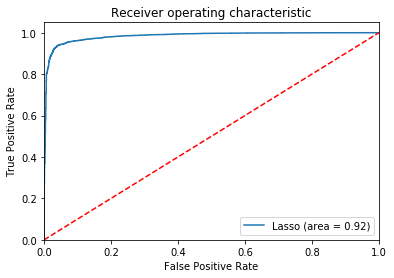

In [28]:
ytrain_predl1 = logreg_l1.predict(X_train_mod1)


logit_roc_auc = roc_auc_score(y_train_mod1, ytrain_predl1)
fpr, tpr, thresholds = roc_curve(y_train_mod1, logreg_l1.predict_proba(X_train_mod1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Lasso (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

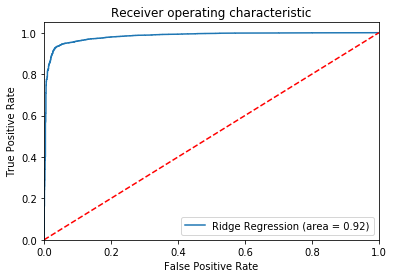

In [30]:
ytrain_predl2 = logreg_l2.predict(X_train_mod1)


logit_roc_auc = roc_auc_score(y_train_mod1, ytrain_predl1)
fpr, tpr, thresholds = roc_curve(y_train_mod1, logreg_l2.predict_proba(X_train_mod1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ridge Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Run Model on Product_test Data

In [220]:
#Load Test Data
testdata = pd.read_csv('product_test.csv') 
testdata.head()
testdata.info()

#Fill Missing Values with 'Missing Value'
testdata["Division"].fillna("Missing Value", inplace = True) 
testdata["Department"].fillna("Missing Value", inplace = True) 
testdata["Type"].fillna("Missing Value", inplace = True) 

#Label Encoding on Test Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
testdata['Department'] =le.fit_transform(testdata.Department)
testdata['Division'] = le.fit_transform(testdata.Division)
testdata['Type'] = le.fit_transform(testdata.Type)

#print(testdata) -#QC Checks



#Run Model1 on Test Data
y_pred_t = logreg_l2.predict(x_t)
print(y_pred_t)

#Convert Array to Data Series
y_preddf=pd.DataFrame(y_pred_t ) 
#print(y_preddf) -Checks
#type(y_preddf)

#Get ID column from Test Data
ID_t = testdata['ID']

#Final Output File
final_op = pd.concat([ID_t,y_preddf],axis =1)
print(final_op)

#download File to 
final_op.to_csv(r'C:\Users\61406\Desktop\QBUS6002 Assignment\FinalOutput.csv', index = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       6803 non-null   int64 
 1   Product_ID               6803 non-null   int64 
 2   Age                      6803 non-null   int64 
 3   Review_Title             5874 non-null   object
 4   Review_Text              6803 non-null   object
 5   Rating                   6803 non-null   int64 
 6   Positive_Feedback_Count  6803 non-null   int64 
 7   Division                 6798 non-null   object
 8   Department               6798 non-null   object
 9   Type                     6798 non-null   object
dtypes: int64(5), object(5)
memory usage: 531.6+ KB
[1 1 1 ... 1 1 0]
         ID  0
0        10  1
1        11  1
2        13  1
3        19  1
4        24  1
...     ... ..
6798  23462  1
6799  23463  1
6800  23465  1
6801  23479  1
6802  23482  0

[6803 